# Лабораторна робота №4. Варіант 15
# Виконав: студент групи ІП-13 Ал Хадам Мурат Резгович
## Візуалізація даних за допомогою matplotlib та Seaborn
### Мета роботи: Ознайомитись з основними діаграмами та графіками, що використовуються при аналізі даних. Навчитись будувати їх за допомогою бібліотек matplotlib та Seaborn.
### Завдання до лабораторної роботи:
1. Побудувати стовпчикові діаграми, на яких відобразити:
а) кількість клієнтів з підключеною голосовою поштою та без;
б) мінімальну кількість хвилин в вечірній час для клієнтів з підключеною голосовою поштою і без;
в) середню оплату міжнародних дзвінків  для клієнтів з підключеним роумінгом та без і з врахуванням лояльності.
2. Побудувати гістограму хвилин в нічний час, загальну і в залежності від підключеного роумінгу.
3. Побудувати діаграму розмаху дзвінків в денний час (загальну і в залежності від підключеної голосової пошти), визначити чи присутні викиди.
4. За допомогою діаграм розсіювання зробити висновки щодо залежності між:
а) міжнародними хвилинами і дзвінками;
б) міжнародними хвилинами і оплатою. Порахувати коефіцієнт кореляції за допомогою відповідних функцій.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('telecom.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,NM,161,408,397-8011,no,no,0,107.5,121,18.28,...,46,21.79,247.2,131,11.12,12.6,3,3.40,2,False
1731,TX,70,415,341-8719,no,no,0,232.8,95,39.58,...,111,25.79,255.6,104,11.50,12.9,7,3.48,0,True
1732,HI,97,415,408-1242,no,yes,43,121.1,105,20.59,...,115,22.12,222.4,100,10.01,8.3,5,2.24,3,False
1733,WA,130,510,406-7726,no,no,0,124.3,70,21.13,...,99,23.01,239.5,83,10.78,3.5,6,0.95,0,False


# 1. Побудувати стовпчикові діаграми, на яких відобразити:
а) кількість клієнтів з підключеною голосовою поштою та без;

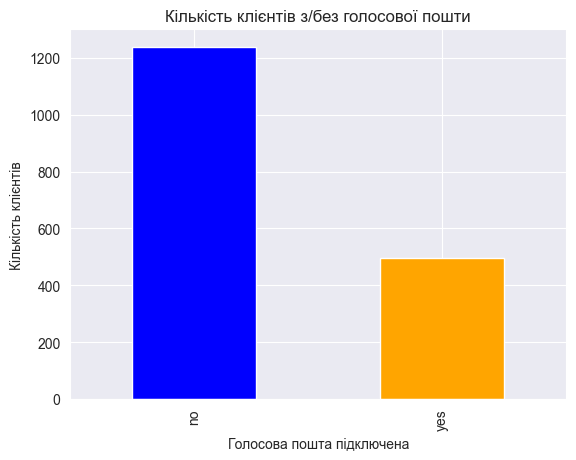

In [2]:
df['voice mail plan'].value_counts().plot(kind='bar', color=['blue', 'orange'])

plt.title('Кількість клієнтів з/без голосової пошти')
plt.xlabel('Голосова пошта підключена')
plt.ylabel('Кількість клієнтів')
plt.show()

б) мінімальну кількість хвилин в вечірній час для клієнтів з підключеною голосовою поштою і без;

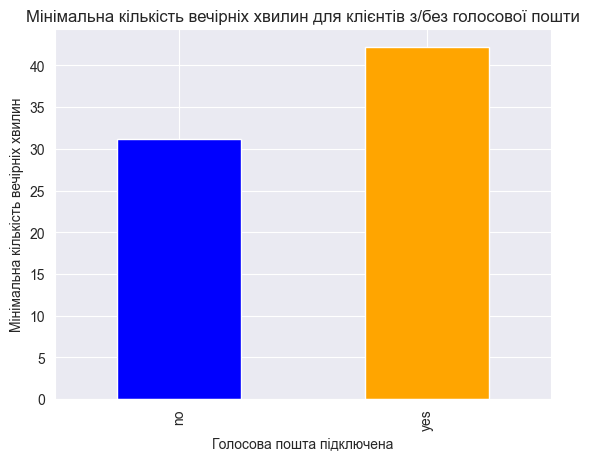

In [3]:
min_evening_minutes = df.groupby('voice mail plan')['total eve minutes'].min()

min_evening_minutes.plot(kind='bar', color=['blue', 'orange'])
plt.title('Мінімальна кількість вечірніх хвилин для клієнтів з/без голосової пошти')
plt.xlabel('Голосова пошта підключена')
plt.ylabel('Мінімальна кількість вечірніх хвилин')
plt.show()

в) середню оплату міжнародних дзвінків  для клієнтів з підключеним роумінгом та без і з врахуванням лояльності.

In [4]:
avg_intl_charge = df.groupby(['international plan', 'churn'])['total intl charge'].mean()
avg_intl_charge

international plan  churn
no                  False    2.745050
                    True     2.750443
yes                 False    2.617019
                    True     3.221231
Name: total intl charge, dtype: float64

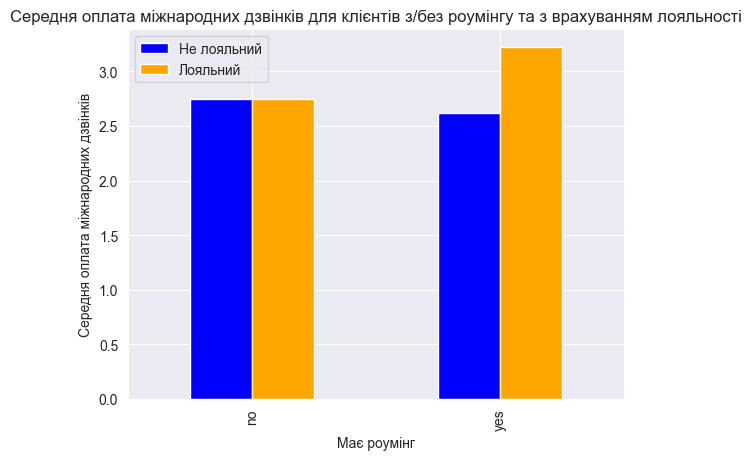

In [5]:
avg_intl_charge.unstack().plot(kind='bar', color=['blue', 'orange'])
plt.title('Середня оплата міжнародних дзвінків для клієнтів з/без роумінгу та з врахуванням лояльності')
plt.xlabel('Має роумінг')
plt.ylabel('Середня оплата міжнародних дзвінків')
plt.legend(labels=['Не лояльний', 'Лояльний'])
plt.show()

# 2
Побудувати гістограму хвилин в нічний час

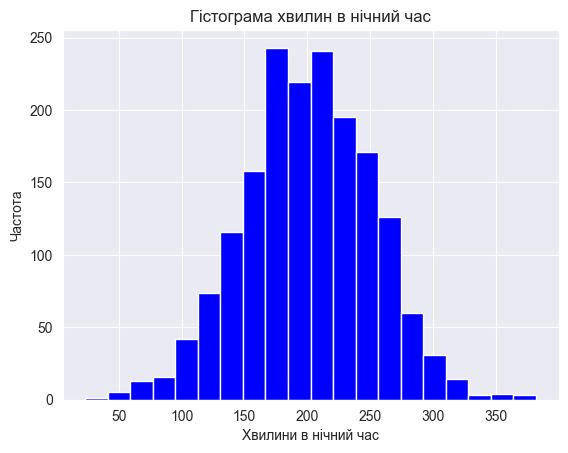

In [6]:
night_minutes = df['total night minutes']

plt.hist(night_minutes, bins=20, color='blue')
plt.title('Гістограма хвилин в нічний час')
plt.xlabel('Хвилини в нічний час')
plt.ylabel('Частота')
plt.show()

Побудувати загальну гістограму хвилин

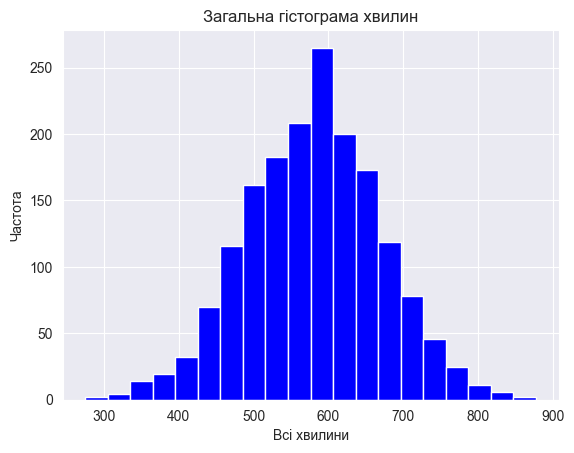

In [7]:
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

plt.hist(df['total minutes'], bins=20, color='blue')
plt.title('Загальна гістограма хвилин')
plt.xlabel('Всі хвилини')
plt.ylabel('Частота')
plt.show()

Побудувати гістограму хвилин в залежності від підключеного роумінгу.

seaborn

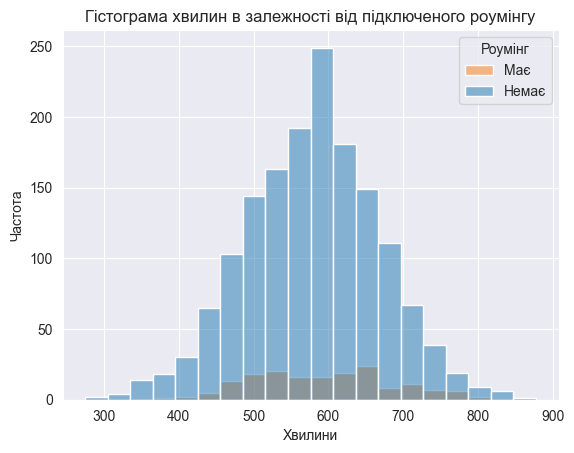

In [8]:
sns.histplot(df, x='total minutes', hue='international plan', bins=20)
plt.title('Гістограма хвилин в залежності від підключеного роумінгу')
plt.xlabel('Хвилини')
plt.ylabel('Частота')
plt.legend(title='Роумінг', labels=['Має', 'Немає'])
plt.show()

matplotlib

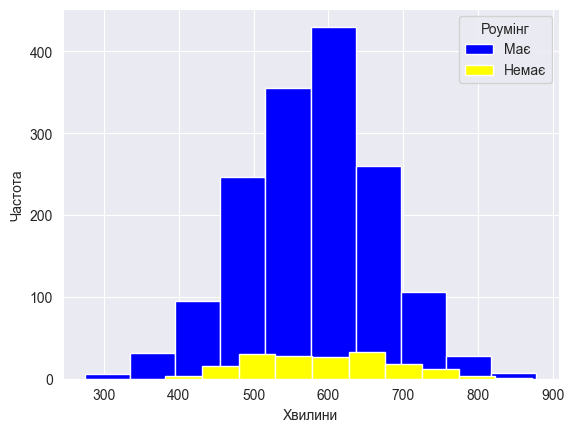

In [9]:
plt.hist(df[df['international plan'] == 'no']['total minutes'], color='blue')
plt.hist(df[df['international plan'] == 'yes']['total minutes'], color='yellow')
plt.xlabel('Хвилини')
plt.ylabel('Частота')
plt.legend(title='Роумінг', labels=['Має', 'Немає'])
plt.show()

# 3
Побудувати діаграму розмаху дзвінків в денний час загальну, визначити чи присутні викиди.

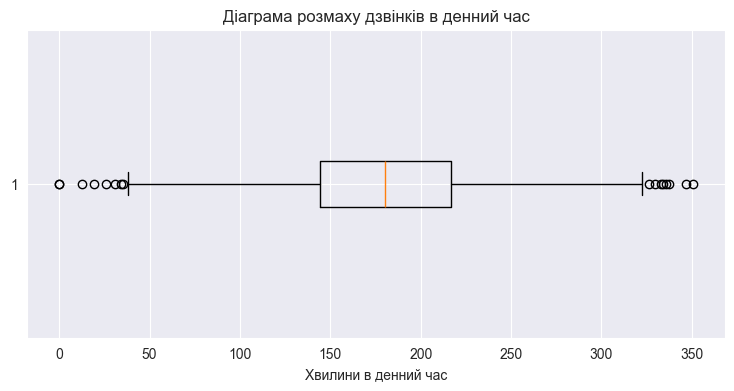

In [10]:
plt.figure(figsize=(9, 4))
plt.boxplot(df['total day minutes'], vert=False)
plt.title('Діаграма розмаху дзвінків в денний час')
plt.xlabel('Хвилини в денний час')
plt.show()

Побудувати діаграму розмаху дзвінків в денний час в залежності від підключеної голосової пошти, визначити чи присутні викиди.

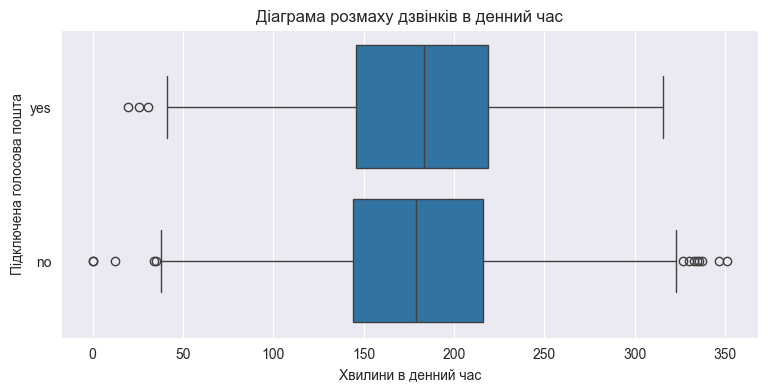

In [11]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df['total day minutes'], y=df['voice mail plan'])
plt.title('Діаграма розмаху дзвінків в денний час')
plt.ylabel('Підключена голосова пошта')
plt.xlabel('Хвилини в денний час')
plt.show()

### Викиди позначені на діаграмі розкиду поза вусами boxplot.

# 4
За допомогою діаграм розсіювання зробити висновки щодо залежності між:
а) міжнародними хвилинами і дзвінками;

In [12]:
def check_correlation(data, par1, par2):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[par1], y=data[par2])
    plt.xlabel(par1)
    plt.ylabel(par2)
    plt.show()

    corr_coeff = data[par1].corr(df[par2])
    print(f"Коєфіцієнт кореляції між {par1} та {par2}: {round(corr_coeff, 4)}")

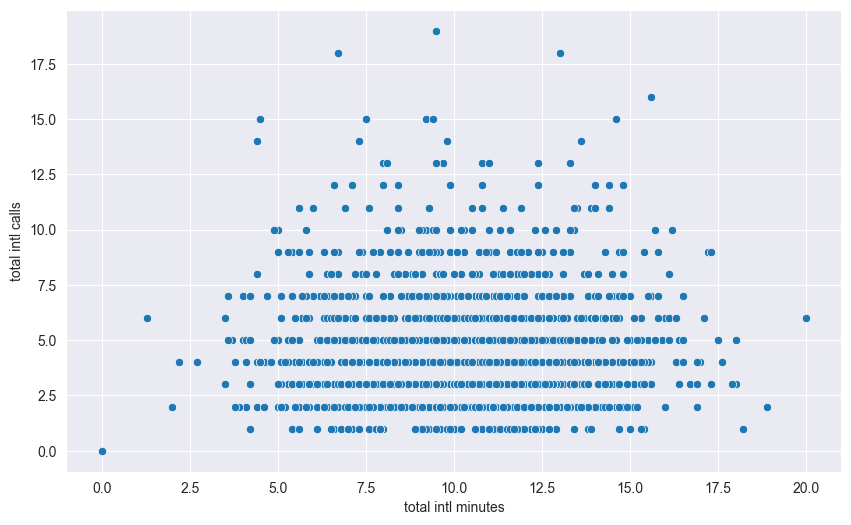

Коєфіцієнт кореляції між total intl minutes та total intl calls: 0.0487


In [13]:
check_correlation(df, 'total intl minutes', 'total intl calls')

### Залежність між цими двома змінними майже відсутня, що можна побачити, і на діаграмі розсіювання, і за значеням коєфіцієнту кореляції.

б) міжнародними хвилинами і оплатою.

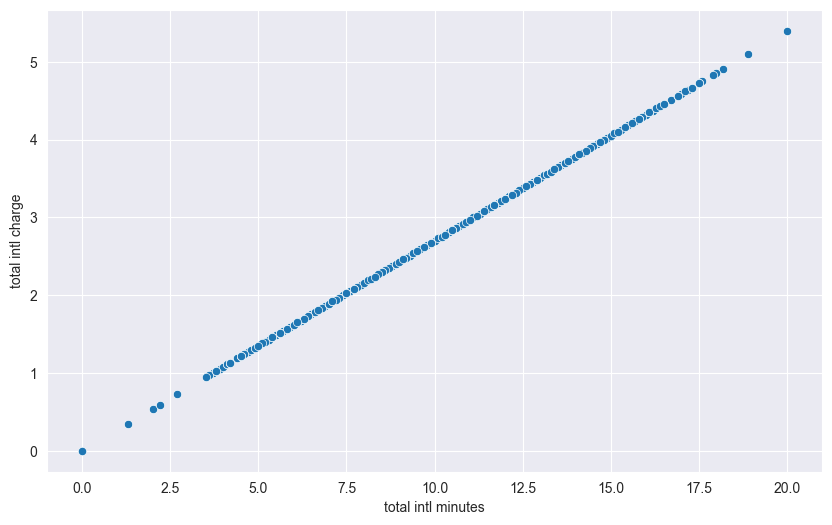

Коєфіцієнт кореляції між total intl minutes та total intl charge: 1.0


In [14]:
check_correlation(df, 'total intl minutes', 'total intl charge')

### Залежність між цими двома змінними рівна 1, що свідчить нам про пряму залежність (позитивну кореляцію) оплати за роумінг з кількістю витрачених хвилин в роумінгу. Що є логічним, адже при більшій кількості розмов у роумінгу, користувач повинен більше сплатит за надані послуги.